The goal for this project is to predict NBA players' positions using their stats. I'll be using Tensorflow and Keras to input the stats into a neural network. 

In [1]:
import pandas as pd
import tensorflow as tf
import keras as keras

In [2]:
players = pd.read_csv("players.csv")

Stats retrieved from basketball reference. Stats are normalized to per 36 minutes.
https://www.basketball-reference.com/leagues/NBA_2023_per_minute.html

In [3]:
players.get("Pos").unique()

array(['C', 'SG', 'PF', 'PG', 'SF', 'SG-PG', 'SF-SG', 'PG-SG', 'SF-PF',
       'PF-C', 'PF-SF'], dtype=object)

In [4]:
def posToNum(pos):
    if pos == "C":
        return 4
    elif pos == ("SG"):
        return 1
    elif pos == ("PF"):
        return 3
    elif pos == ("PG"):
        return 0
    elif pos == ("SF"):
        return 2
    elif pos == ("PG-SG"):
        return 0
    elif pos == ("SG-PG"):
        return 1
    elif pos == ("SF-SG"):
        return 2
    elif pos == ("SF-PF"):
        return 2
    elif pos == ("PF-C"):
        return 3
    elif pos == ("PF-SF"):
        return 3


Turning the positions into numbers. Starting at zero seems to be important for the sparse categorical cross entropy loss function. If a player is listed as two positions, they'll be treated as whichever is listed first. Notably, some players are listed as PG-SG, and some are labeled as SG-PG, for example.

In [5]:
playersWithPosNum = players.assign(PosNum = players.get("Pos").apply(posToNum))
playersWithPosNumSample = playersWithPosNum.sample(200)

I'm going to be training my model on 200 players out of 539 players, and then I will be evaluating it on all 539.

In [6]:
playersWithPosNumSampleTrainX = playersWithPosNumSample.drop(columns = ["Rk", "Player", "Pos", "Tm", "Age", "Player-additional", "PosNum", "MP", "G", "GS"])

Dropping irrelevant columns. Notably I'm assuming that games played, games started, and minutes played have no correlation to position. I tried doing it with those three stats included and my results were actually considerably worse. I might want to consider dropping even more columns honestly. Maybe even find the few most important columns. 

In [7]:
playersWithPosNumSampleTrainX = playersWithPosNumSampleTrainX.fillna(0)

In [8]:
playersWithPosNumSampleTrainX = playersWithPosNumSampleTrainX.to_numpy()

In [9]:
playersWithPosNumSampleTrainY = playersWithPosNumSample.get(["PosNum"]).to_numpy()

In [10]:
playersWithPosNumSampleTrainX.shape

(200, 21)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(24),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5)]
)
lossFN = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model.compile(
    optimizer = "Adam",
    loss = lossFN,
    metrics = ["accuracy"]
)
model.fit(playersWithPosNumSampleTrainX, playersWithPosNumSampleTrainY, epochs = 100)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 11.7529 - accuracy: 0.2300
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 9.1790 - accuracy: 0.2050
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 6.8743 - accuracy: 0.2500
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 6.4296 - accuracy: 0.3000
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 5.3771 - accuracy: 0.2850
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 4.5715 - accuracy: 0.3750
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 4.2296 - accuracy: 0.3200
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 4.1854 - accuracy: 0.3150
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 3.8509 - accuracy: 0.3100
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 3.6453 - accuracy: 0.3700
Epoch 11/100
7/7 [==========

For the model, I tried adding more dense layers and it didn't seem to make it better. In fact it seems to make it slightly worse. That maybe points to the idea that some of these variables aren't helping. See below:

In [12]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(24),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5)]
)
lossFN2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model2.compile(
    optimizer = "Adam",
    loss = lossFN2,
    metrics = ["accuracy"]
)
model2.fit(playersWithPosNumSampleTrainX, playersWithPosNumSampleTrainY, epochs = 100)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 6.8864 - accuracy: 0.2500
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 6.2411 - accuracy: 0.2200
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 5.2385 - accuracy: 0.2700
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 4.7282 - accuracy: 0.2550
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 4.5817 - accuracy: 0.2900
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 4.5365 - accuracy: 0.2750
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 3.9448 - accuracy: 0.2800
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 3.9333 - accuracy: 0.3200
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 3.3355 - accuracy: 0.3250
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 2.9970 - accuracy: 0.3400
Epoch 11/100
7/7 [===========

I'll try a different activation function for the dense layer.

In [13]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(21, activation = "tanh"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation = "softmax")]
)
lossFN3 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model3.compile(
    optimizer = "Adam",
    loss = lossFN3,
    metrics = ["sparse_categorical_accuracy"]
)
model3.fit(playersWithPosNumSampleTrainX, playersWithPosNumSampleTrainY, epochs = 100)

Epoch 1/100


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 1s 2ms/step - loss: 2.1750 - sparse_categorical_accuracy: 0.2700
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 1.8542 - sparse_categorical_accuracy: 0.2900
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 1.8427 - sparse_categorical_accuracy: 0.2350
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 1.7255 - sparse_categorical_accuracy: 0.2750
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 1.5989 - sparse_categorical_accuracy: 0.3250
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 1.6100 - sparse_categorical_accuracy: 0.3000
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.5987 - sparse_categorical_accuracy: 0.3250
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 1.6295 - sparse_categorical_accuracy: 0.3000
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 1.5485 - spar

I simply tried every single activation function. Seems that putting an activation function on the second dense layer made things worse usually. None of the activation functions made a huge difference honestly, although it seems to me that the "tanh" function may have made the model slightly better, so I'll be using that one. Honestly I'm a bit worried that I'm simply overfitting. 

I want to add the height and weight of each player but I'm not sure where to find the information. It's on nba.com but they don't have it available for download, so I have to find a way to get it I guess. https://www.nba.com/stats/players/bio?


In [14]:
import json

In [15]:
import numpy as np

In [16]:
jsonLoaded = json.load(open('players.json'))

playerBios = pd.json_normalize(jsonLoaded["resultSets"])

In [17]:
playerBiosArray = playerBios.get("rowSet")[0]

In [18]:
weights = []
heights = []
names = []
for i in range(len(playerBiosArray)):
    weights = weights + [playerBiosArray[i][7]]
    heights = heights + [playerBiosArray[i][5]]
    names = names + [playerBiosArray[i][1]]


In [19]:
playerBiosDF = pd.DataFrame(columns = ["Names", "Weights", "Heights"])

In [20]:
playerBiosDF = playerBiosDF.assign(Names = names).assign(Weights = weights).assign(Heights = heights)

In [21]:
def normalizeNames(name):
    name = name.replace(" ", "")
    name = name.replace("Jr.", "")
    name = name.replace("ā", "a")
    name = name.replace("ć", "c")
    name = name.replace("Č", "C")
    name = name.replace("č", "c")
    name = name.replace("é", "e")
    name = name.replace("ó", "o")
    name = name.replace("III", "")
    name = name.replace("Sr.", "")
    name = name.replace("ņ", "n")
    name = name.replace("ģ", "g")
    name = name.replace("Š", "S")
    name = name.replace("ö", "o")
    name = name.replace("Ş", "S")
    name = name.replace("ü", "u")
    name = name.replace("ū", "u")
    name = name.replace("II", "")
    name = name.replace(".", "")
    return name
playerBiosDF = playerBiosDF.assign(NamesAgain = playerBiosDF.get("Names").apply(normalizeNames))
playerBiosDF
playersNormNames = players.assign(Player = players.get("Player").apply(normalizeNames))
for person in playersNormNames.get("Player").array:
    if person not in playerBiosDF.get("NamesAgain").array:
        print(person)

Ok well there was definitely a better way to do this. I literally just added every edge case to the replacing function so that the names would match up.

In [22]:
def heightToInches(height):
    heightArray = height.split("-")
    return float(heightArray[0]) * 12 + float(heightArray[1])

In [23]:
def heightFinder(name):
    normedName = normalizeNames(name)
    return heightToInches(playerBiosDF[playerBiosDF.get("NamesAgain") == normedName].get("Heights").iloc[0])
def weightFinder(name):
    normedName = normalizeNames(name)
    return float(playerBiosDF[playerBiosDF.get("NamesAgain") == normedName].get("Weights").iloc[0])

In [24]:
playersWithBio = playersWithPosNumSample.assign(Weight = playersWithPosNumSample.get("Player").apply(weightFinder)).assign(Height = playersWithPosNumSample.get("Player").apply(heightFinder))

In [25]:
playersWithBioX = playersWithBio.drop(columns = ["Rk", "Player", "Pos", "Tm", "Age", "Player-additional", "PosNum", "MP", "G", "GS"]).fillna(0).to_numpy()

In [26]:
playersWithBioY = playersWithBio.get(["PosNum"]).to_numpy()

In [27]:
playersWithBioX.shape

(200, 23)

In [28]:
playersWithBioX.shape

(200, 23)

In [29]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(23, activation = "tanh"),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(5)]
)
lossFN4 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model4.compile(
    optimizer = "Adam",
    loss = lossFN4,
    metrics = ["accuracy"]
)
model4.fit(playersWithBioX, playersWithBioY, epochs = 200)

Epoch 1/200


7/7 [==============================] - 1s 2ms/step - loss: 2.1380 - accuracy: 0.2250
Epoch 2/200
7/7 [==============================] - 0s 2ms/step - loss: 1.9315 - accuracy: 0.2100
Epoch 3/200
7/7 [==============================] - 0s 1ms/step - loss: 1.8647 - accuracy: 0.2350
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 1.7638 - accuracy: 0.2650
Epoch 5/200
7/7 [==============================] - 0s 2ms/step - loss: 1.8044 - accuracy: 0.2000
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 1.8115 - accuracy: 0.2050
Epoch 7/200
7/7 [==============================] - 0s 2ms/step - loss: 1.7745 - accuracy: 0.1950
Epoch 8/200
7/7 [==============================] - 0s 2ms/step - loss: 1.8200 - accuracy: 0.2200
Epoch 9/200
7/7 [==============================] - 0s 2ms/step - loss: 1.6734 - accuracy: 0.2450
Epoch 10/200
7/7 [==============================] - 0s 2ms/step - loss: 1.7087 - accuracy: 0.2400
Epoch 11/200
7/7 [=======================

After adding the height and weight the results are somehow worse. Not sure how that's possible, I would've thought that the height and weight were quite informative. 

In [30]:
numColumns = ['Rk',   'Age', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PosNum', 'Weight', 'Height']

In [31]:
coeffs = []
for col in numColumns:
    coeffs = coeffs +  [np.abs(np.corrcoef(playersWithBio.fillna(0).get(col).to_numpy(), playersWithBio.get("PosNum").to_numpy())[0][1])]

In [32]:
coeffsDF = pd.DataFrame().assign(cols = numColumns).assign(coefficients = coeffs)

In [33]:
coeffsDF.sort_values("coefficients", ascending = False)

,cols,coefficients
26,PosNum,1.000000
28,Height,0.844252
27,Weight,0.759510
19,TRB,0.719608
17,ORB,0.700204
18,DRB,0.619081
22,BLK,0.608353
20,AST,0.588438
9,3PA,0.534446
8,3P,0.509979


I'm going to try only using the variables that seem to be highly correlated with the position number. Two of which seem to be height and weight, which is what I would've guessed. I'm not sure why adding those didn't make the model any better. I tried doing models that only have one variable and if that variable is height or weight it ends up basically just guessing (20 percent accuracy). However, if I use offensive rebounds, that accuracy number goes to about 35 percent despite offensive rebounds being a lower correlation. I think there's something fundamental I'm not understanding here.

Okay I just tried inputting only the position number into the neural network and it still doesn't get to above 40 percent accuracy so maybe the correlation just isn't a good indicator of anything.

In [34]:
playersWithBioLimitedX = playersWithBio.fillna(0).get([ "ORB", "TRB", "AST", "DRB", "FG%", "PF", "3PA", "2P%", "3P", "2P", "FGA", "BLK", "3P%", "FT%", "STL", "2PA", "TOV", "PTS", "FG", "FTA", "FT"]).to_numpy()
#playersWithBioLimitedX = playersWithBio.fillna(0).get(["2P"]).to_numpy()
model5 = tf.keras.Sequential([
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(playersWithBioLimitedX.shape[1], activation = "tanh"),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(5)]
)
lossFN5 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model5.compile(
    optimizer = "Adam",
    loss = lossFN5,
    metrics = ["sparse_categorical_accuracy"]
)
model5.fit(playersWithBioLimitedX, playersWithBioY, epochs = 100)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 2.0825 - sparse_categorical_accuracy: 0.1550
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 1.8671 - sparse_categorical_accuracy: 0.2000
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 1.8266 - sparse_categorical_accuracy: 0.2000
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 1.7033 - sparse_categorical_accuracy: 0.1850
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 1.7069 - sparse_categorical_accuracy: 0.2600
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1.5794 - sparse_categorical_accuracy: 0.2150
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.6281 - sparse_categorical_accuracy: 0.2600
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 1.6074 - sparse_categorical_accuracy: 0.2200
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 1

I tried starting with the most correlated variables only and just slowly adding more and it still ended up better without the height and weight. I have no idea why.

In [35]:
playersWithBio

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Player-additional,PosNum,Weight,Height
295,296,Kevon Looney,C,26,GSW,82,70,1958,4.4,7.1,...,3.8,1.0,0.9,0.8,4.1,10.6,looneke01,4,222.0,81.0
155,156,Daniel Gafford,C,24,WAS,78,47,1604,6.5,8.9,...,1.9,0.7,2.2,1.9,4.2,15.8,gaffoda01,4,234.0,82.0
315,316,Tyrese Maxey,SG,22,PHI,60,41,2016,7.8,16.3,...,3.8,0.9,0.1,1.4,2.4,21.7,maxeyty01,1,200.0,74.0
338,339,Evan Mobley,PF,21,CLE,79,79,2715,7.0,12.6,...,3.0,0.8,1.6,1.9,2.9,16.9,mobleev01,3,215.0,83.0
79,80,Vlatko Čančar,PF,25,DEN,60,9,889,4.4,9.2,...,3.2,0.9,0.6,1.5,3.4,12.0,cancavl01,3,236.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,320,CJ McCollum,SG,31,NOP,75,75,2649,8.0,18.3,...,5.8,1.0,0.5,2.5,2.1,21.3,mccolcj01,1,190.0,75.0
320,321,T.J. McConnell,PG,30,IND,75,6,1526,6.7,12.3,...,9.4,1.9,0.2,3.4,2.5,15.3,mccontj01,0,190.0,73.0
46,47,Bol Bol,PF,23,ORL,70,33,1505,6.2,11.4,...,1.7,0.7,2.0,2.7,2.2,15.2,bolbo01,3,220.0,86.0
137,138,Jalen Duren,C,19,DET,67,31,1670,5.6,8.6,...,1.6,0.9,1.3,2.0,3.9,13.2,durenja01,4,250.0,83.0


In [36]:
playersAbove500 = playersWithBio[players.get("MP") > 500]

C:\Users\Owner\AppData\Local\Temp\ipykernel_87472\1717600750.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  playersAbove500 = playersWithBio[players.get("MP") > 500]


<Axes: xlabel='Height', ylabel='PosNum'>

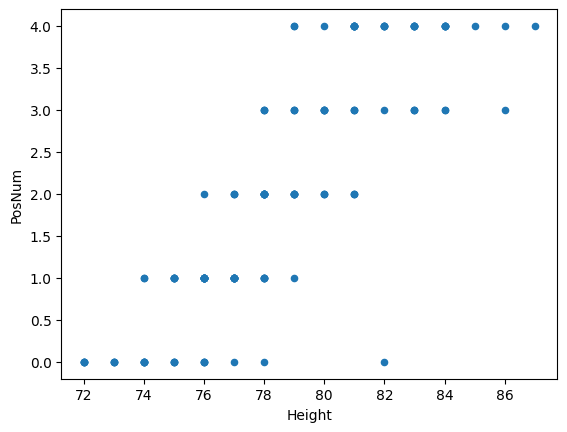

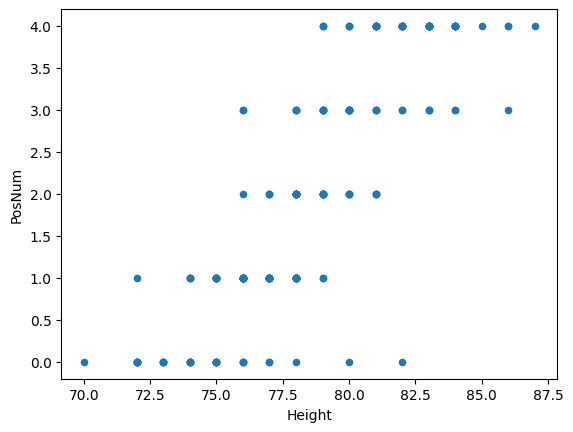

In [37]:
playersAbove500.plot(kind = "scatter", x = "Height", y = "PosNum")
playersWithBio.plot(kind = "scatter", x = "Height", y = "PosNum")

In [78]:
def runModelOnDF(df, epochs, sampleAmount, predCol, uselessCols):
    df = df.drop(columns = uselessCols).fillna(0)
    #numCols = []
    #for col in df.columns:
    #    if (type(df.get(col)[0]) == np.dtype("int64") or type(df.get(col)[0]) == np.dtype("float64")):
    #        numCols = numCols + [col]
    #dfNumsOnly = df.get(numCols)
    dfNumsOnly = df.select_dtypes(include=[np.int64, np.float64])
    dfSample = dfNumsOnly.sample(int(np.floor(dfNumsOnly.shape[0]*sampleAmount)))
    dfSampleX = dfSample.drop(columns = [predCol]).to_numpy()
    dfSampleY = dfSample.get(predCol).to_numpy()
    modelFunction = tf.keras.Sequential([
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dense(dfSampleX.shape[1], activation = "tanh"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5)]
    )
    lossFNFunction  = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
    modelFunction .compile(
        optimizer = "Adam",
        loss = lossFNFunction ,
        metrics = ["sparse_categorical_accuracy"]
    )
    modelFunction.fit(dfSampleX, dfSampleY, epochs = epochs, verbose = 0)
    metricScore = modelFunction.evaluate(x = dfNumsOnly.drop(columns = [predCol]).to_numpy(), y = dfNumsOnly.get([predCol]).to_numpy(), verbose = 0)
    return metricScore[1]
    

In [93]:
runModelOnDF(playersWithBio, 100, .3, "PosNum", ["Rk", "Age", "MP", "G", "GS", "Height", "Weight"])

0.550000011920929

In [101]:
noBios = []
runs = 100
for i in range(runs):
    noBios += [runModelOnDF(playersWithPosNum, 100, .3, "PosNum", ["Rk", "Age", "MP", "G", "GS"])]
sum(noBios) / len(noBios)

0.5113543590903282

In [102]:
withBios = []
for i in range(runs):
    withBios += [runModelOnDF(playersWithBio, 100, .3, "PosNum", ["Rk", "Age", "MP", "G", "GS"])]
sum(withBios) / len(withBios)

0.37129999831318855

<Axes: ylabel='Frequency'>

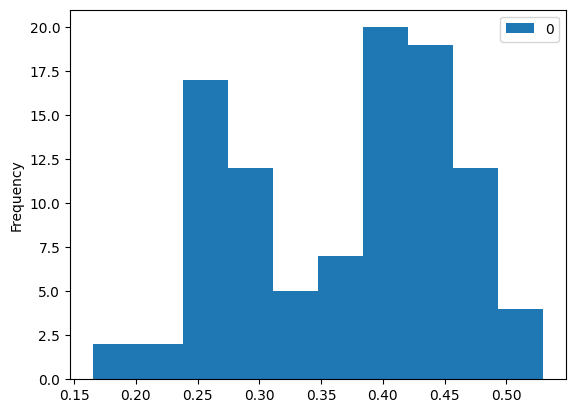

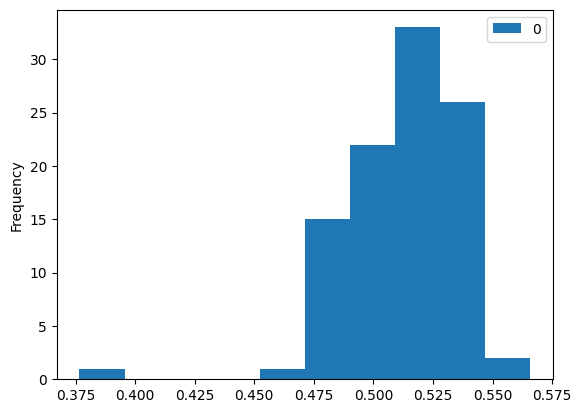

In [110]:
withBiosDF = pd.DataFrame(withBios)
noBiosDF = pd.DataFrame(noBios)
withBiosDF.plot(kind = "hist")
noBiosDF.plot(kind = "hist")

Well given the large variance in the accuracy of the model when run with the height and weight included, it seems that the problem might be multicollinearity. I will try to mitigate this using Principal Component Analysis.